<a href="https://colab.research.google.com/github/zeel2321-lit/Stock_Price_Prediction_/blob/main/Stock_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#stock market prediction

To predict the closing stock price of the Corporation (Reliance)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Reliance_training_1 = pd.read_csv('/content/RELIANCE.NS (1).csv')

In [3]:
Reliance_training_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-04-2017,664.699341,683.768555,662.247559,680.871033,663.438965,20715169
1,05-04-2017,691.049561,702.342468,683.570435,700.856567,682.912842,18609462
2,06-04-2017,697.884766,717.647400,694.516663,712.496277,694.254578,23361514
3,07-04-2017,703.976990,710.267395,694.690063,696.696045,678.858887,14710432
4,10-04-2017,698.380066,705.760071,682.183594,684.189575,666.672546,14199616
...,...,...,...,...,...,...,...
1232,29-03-2022,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695
1233,30-03-2022,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028
1234,31-03-2022,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744
1235,01-04-2022,2636.000000,2665.149902,2622.000000,2655.850098,2655.850098,3656408


In [4]:
Reliance_training = Reliance_training_1.iloc[:,1:2].values

In [5]:
Reliance_training_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-04-2017,664.699341,683.768555,662.247559,680.871033,663.438965,20715169
1,05-04-2017,691.049561,702.342468,683.570435,700.856567,682.912842,18609462
2,06-04-2017,697.884766,717.647400,694.516663,712.496277,694.254578,23361514
3,07-04-2017,703.976990,710.267395,694.690063,696.696045,678.858887,14710432
4,10-04-2017,698.380066,705.760071,682.183594,684.189575,666.672546,14199616
...,...,...,...,...,...,...,...
1232,29-03-2022,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695
1233,30-03-2022,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028
1234,31-03-2022,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744
1235,01-04-2022,2636.000000,2665.149902,2622.000000,2655.850098,2655.850098,3656408


In [6]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
Reliance_training_processed = scaler.fit_transform(Reliance_training)

In [7]:
Reliance_training_processed.shape

(1237, 1)

In [8]:
#forming the training data using the window size for the feature mapping
feature_set=[]
labels=[]

#window size = 60
for i in range(60, Reliance_training_processed.shape[0]):
  feature_set.append(Reliance_training_processed[i-60:i,0])
  labels.append(Reliance_training_processed[i,0])

In [9]:
len(feature_set)

1177

In [10]:
feature_set, labels = np.array(feature_set), np.array(labels)   #conversion from list to array

In [11]:
#reshaping the dimension of featured dataset because while performing lstm, we will have one indicator feature
feature_set.shape

(1177, 60)

In [12]:
#reshaping
features_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1 ))

In [13]:
features_set.shape

(1177, 60, 1)

In [14]:
#building the LSTM model

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense   #dropout is used for regularization

In [15]:
model = Sequential()

In [16]:
model.add(LSTM(units = 150, return_sequences = True, input_shape = (features_set.shape[1], 1)))    #first hidden layer

In [17]:
model.add(Dropout(0.2))

In [18]:
model.add(LSTM(units = 150, return_sequences = True))    #second hidden layer
model.add(Dropout(0.2))

model.add(LSTM(units = 150, return_sequences = True))    #third hidden layer
model.add(Dropout(0.2))

model.add(LSTM(units = 150))    #fourth hidden layer
model.add(Dropout(0.2))

In [19]:
model.add(Dense(units = 1))   #single value output

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 60, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 150)           180600    
                                                                 
 dropout_2 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               1

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(features_set, labels, epochs = 100, batch_size = 32, verbose=1)

Epoch 1/100
37/37 [==============================] - 25s 434ms/step - loss: 0.0595
Epoch 2/100
37/37 [==============================] - 16s 425ms/step - loss: 0.0046
Epoch 3/100
37/37 [==============================] - 16s 423ms/step - loss: 0.0034
Epoch 4/100
37/37 [==============================] - 16s 431ms/step - loss: 0.0034
Epoch 5/100
37/37 [==============================] - 16s 426ms/step - loss: 0.0032
Epoch 6/100
37/37 [==============================] - 15s 415ms/step - loss: 0.0035
Epoch 7/100
37/37 [==============================] - 15s 412ms/step - loss: 0.0032
Epoch 8/100
37/37 [==============================] - 15s 412ms/step - loss: 0.0029
Epoch 9/100
37/37 [==============================] - 15s 413ms/step - loss: 0.0025
Epoch 10/100
37/37 [==============================] - 15s 414ms/step - loss: 0.0026
Epoch 11/100
37/37 [==============================] - 15s 413ms/step - loss: 0.0034
Epoch 12/100
37/37 [==============================] - 15s 411ms/step - loss: 0.0027
E

In [23]:
features_set.shape

(1177, 60, 1)

In [24]:
#Testing the dataset
Reliance_testing_1 = pd.read_csv(r'/content/RELIANCE.NS (1).csv')

In [25]:
Reliance_testing = Reliance_testing_1.iloc[:, 1:2].values

In [26]:
Reliance_testing_final = pd.concat((Reliance_training_1['Open'], Reliance_testing_1['Open']), axis = 0)

In [27]:
Reliance_testing_final.shape

(2474,)

In [28]:
testing_dataset = Reliance_testing_final[len(Reliance_testing_final)-len(Reliance_testing)-60:].values

In [29]:
testing_dataset.shape

(1297,)

In [30]:
testing_dataset = testing_dataset.reshape(-1,1)

In [31]:
testing_dataset = scaler.transform(testing_dataset)

In [32]:
testing_dataset.shape

(1297, 1)

In [33]:
test_features = []
for i in range(60,80):
  test_features.append(testing_dataset[i-60:i,0])

In [34]:
test_features=np.array(test_features)

In [35]:
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))


In [36]:
test_features.shape

(20, 60, 1)

In [37]:
#Prediction
predictions = model.predict(test_features)

In [38]:
predictions.shape

(20, 1)

In [39]:
predictions = scaler.inverse_transform(predictions)

In [40]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("/content/RELIANCE.NS (1).csv")


In [42]:

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [43]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [44]:
#creating train and test sets
dataset = new_data.values

In [45]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [46]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [47]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [48]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
# 

One reason for adding another Dense layer after the final LSTM is allowing the model to be more expressive (and also more prone to overfitting)

In [49]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 27s - loss: 0.0020 - 27s/epoch - 29ms/step


In [50]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [51]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [52]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [53]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

109.39893153721556

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


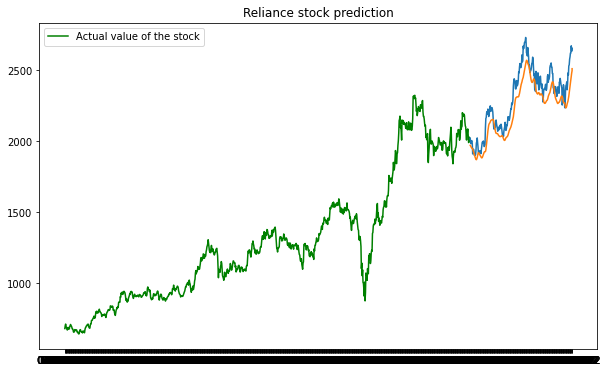

In [54]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
plt.figure(figsize=(10,6))

valid['Predictions'] = closing_price
plt.plot(train['Close'],color = 'green', label = 'Actual value of the stock')
#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('Reliance stock prediction')
plt.legend()
plt.show()


The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs.

blue - testing 

yellow - prediction

green training 

In [55]:
predictions 

array([[2570.1067 ],
       [1946.224  ],
       [1318.7865 ],
       [ 823.20575],
       [ 560.7008 ],
       [ 522.90533],
       [ 606.2088 ],
       [ 699.80206],
       [ 747.16766],
       [ 749.95886],
       [ 733.8836 ],
       [ 713.52594],
       [ 698.76184],
       [ 692.8845 ],
       [ 697.52356],
       [ 713.89795],
       [ 731.1561 ],
       [ 740.17194],
       [ 740.1741 ],
       [ 734.7724 ]], dtype=float32)

In [56]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

We will be using a sequential model and adding the layers of the LSTM as said, in the above sentence. The first layer should be the time step in 1.

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
#Now the final part is to fit the X_train and the y_train.
# Predict both the X_train and the X_test, now let’s scaler inverse transform because I want to see the root mean square performance.

In [60]:
train_predict=model.predict(x_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [74]:
import math

rms=np.sqrt(np.mean(np.power((y_train-test_predict),2)))
rms

494.0134042154235

If I consider the last date in the test data as of 2022-04-01, I want to predict the output of 2022-05-01. We need the previous 60 data for that I am taking the data and reshaping it.

In [75]:
x_input=valid[990:].values.reshape(1,-1)
x_input.shape

(1, 0)

This is how LSTM predict the prices of preferred stocks using this strategy.